# Regresie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from math import sqrt

Vom folosi setul de date [California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), care este prezent in mod direct pe instantele de Google Colab (acesta poate fi gasit de asemenea si in libraria scikit-learn).

In [ ]:
# Incarcam datele sub forma de DataFrames (din fisierele prezente in Colab)

train_data = pd.read_csv('./sample_data/california_housing_train.csv')
test_data = pd.read_csv('./sample_data/california_housing_test.csv')

# Daca este nevoie sa impartim un DataFrame in subset train si test:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True)

Ne folosim de functia `describe` din Pandas pentru a obtine cateva statistici utile.

Observati ca setul de date nu are valori lipsa (randul `count` ne arata ca pentru fiecare variabila / coloana in parte avem `17000` de intrari in tabel).

In [ ]:
train_data.describe()

Plotam un heatmap pentru corelatiile dintre variabile. Observati ca exista o corelatie destul de puternica intre variabila de input `median_income` si variabila de output (target-ul nostru) `median_house_value`.

In [ ]:
plt.matshow(train_data.corr())
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=8, rotation=30)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=8)
plt.colorbar()
plt.title('Heatmap of Correlation Matrix for California Housing Dataset', y=1.17, fontsize=22)
plt.show()

Impartim acum DataFrame-urile de train si test in DataFrame-uri care sa contina separat variabilele de input si variabila de output.

In [ ]:
x_train = train_data.iloc[:, 0:-1]
y_train = train_data.iloc[:, -1]

x_test = test_data.iloc[:, 0:-1]
y_test = test_data.iloc[:, -1]

Functia `.head()` din Pandas printeaza primele 5 randuri din tabel. Similar, functia `.tail()` le printeaza pe ultimele 5.

In [ ]:
x_train.head()

Plotam acum histograme pentru variabila de output pentru a putea vizualiza direct cam care este distributia preturilor locuintelor din dataset-ul nostru.

In [ ]:
y_train.plot.hist(bins=20)
plt.show()

In [ ]:
y_test.plot.hist(bins=20)
plt.show()

Normalizam datele folosind `z-score`. Nu uitati, folosim pentru normalizare media si deviatia stanadard calculate *doar* pe setul de antrenare!

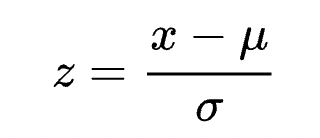

In [ ]:
# Calculam media si deviatia standard pentru x si y (folosind doar datele de antrenare)
x_mean_train = x_train.mean()
x_std_train = x_train.std()

y_mean_train = y_train.mean()
y_std_train = y_train.std()

# Folosim valorile de mai sus pentru a normaliza cele doua subseturi de date
x_train_norm = (x_train - x_mean_train) / x_std_train
y_train_norm = (y_train - y_mean_train) / y_std_train

x_test_norm = (x_test - x_mean_train) / x_std_train
y_test_norm = (y_test - y_mean_train) / y_std_train

In [ ]:
x_train_norm.head()

In [ ]:
y_train_norm.head()

## Modelare

Incepem prin a folosi un regresor liniar standard din libraria `scikit-learn`.

Pasii pe care trebuie sa ii urmam:
1. Initializam modelul (e.g. `LinearRegression`).
2. Facem 'fitting' folosind datele de antrenare (prin functia `.fit(x_train,y_train)` a modelului).
3. (optional) Printam valorile parametrilor modelului nostru, unde este cazul.
4. Calculam predictiile modelului nostru pe datele de antrenare cu `.predict(x_test)`
5. Folosim o metrica pentru a masura performanta modelului nostru (e.g. mean squared error pentru regresie)

In [ ]:
# Initializam Modelul
lin_reg = LinearRegression()

# Ajustam modelul pe datele de antrenare
lin_reg.fit(x_train_norm, y_train_norm)

# Printam coeficientii modelului
print(lin_reg.intercept_, '\n', lin_reg.coef_)

In [ ]:
# Calculam predictiile modelului pe setul de testare
y_pred = lin_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

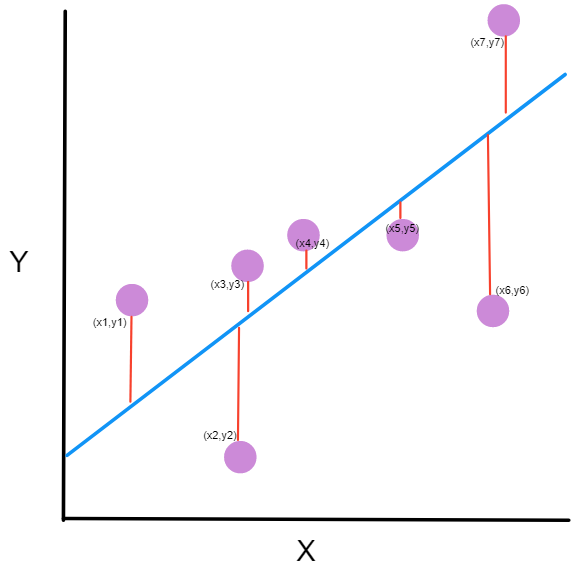

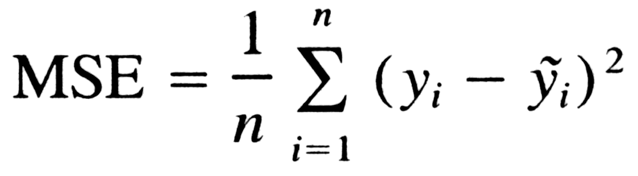

In [ ]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_test, y_pred_unnorm))

In [ ]:
# Initializam Modelul
sgd_reg = SGDRegressor()

# Ajustam modelul pe datele de antrenare
sgd_reg.fit(x_train_norm, y_train_norm)

# Printam coeficientii modelului
print(sgd_reg.intercept_, '\n', sgd_reg.coef_)

In [ ]:
# Calculam predictiile modelului pe setul de testare
y_pred = sgd_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [ ]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_test, y_pred_unnorm))

Ne putem folosi de functia `PolynomialFeatures` ca sa cream un nou set de date `x_poly` adaugand la setul original termenii non-liniari de forma $x^n$.

In [ ]:
# Specificam gradul maxim al termenilor nonliniari.
# Degree (grad) = n inseamna ca se vor folosi toti termenii pana la x^n inclusiv termenii de interactiune (e.g. x^2*x^3 data gradul = 5).
poly = PolynomialFeatures(degree=2)
# poly.get_feature_names(['a','b','c'])
x_train_norm_poly = poly.fit_transform(x_train_norm)
x_test_norm_poly = poly.fit_transform(x_test_norm)

In [ ]:
# Initializam Modelul
pol_reg = LinearRegression()

# Ajustam modelul pe datele de antrenare
pol_reg.fit(x_train_norm_poly, y_train_norm)

# Printam coeficientii modelului
print(pol_reg.intercept_, '\n', pol_reg.coef_)

In [ ]:
# Calculam predictiile modelului pe setul de testare
y_pred = pol_reg.predict(x_test_norm_poly)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [ ]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_test, y_pred_unnorm))

## Arbori Decizionali

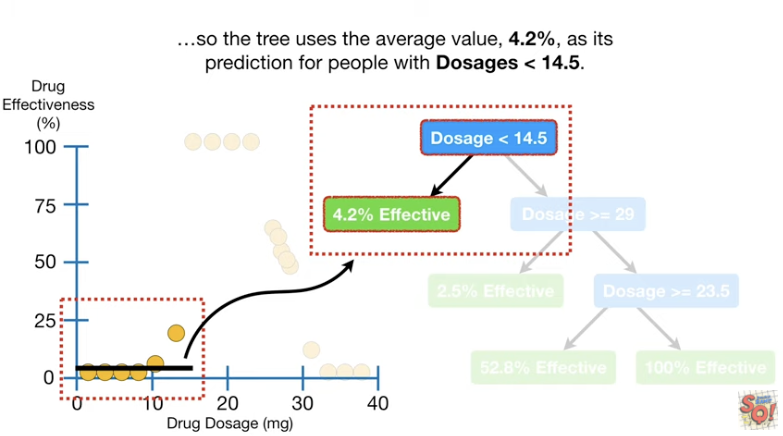

[Sursa!](https://www.youtube.com/watch?v=g9c66TUylZ4)

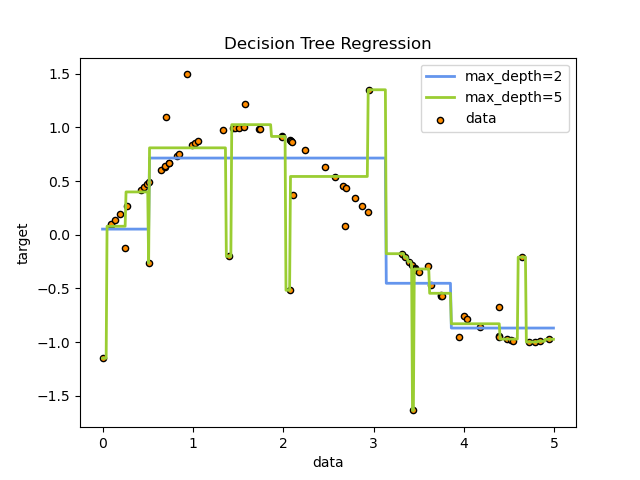

Arbore Decizional Simplu

In [ ]:
# Initializam Modelul
dt_reg = DecisionTreeRegressor()

# Ajustam modelul pe datele de antrenare
dt_reg.fit(x_train_norm, y_train_norm)

DecisionTreeRegressor()

In [ ]:
# Calculam predictiile modelului pe setul de testare
y_pred = dt_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [ ]:
y_pred

In [ ]:
 # Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_pred_unnorm, y_test))

### Ansambluri de Arbori Decizionali

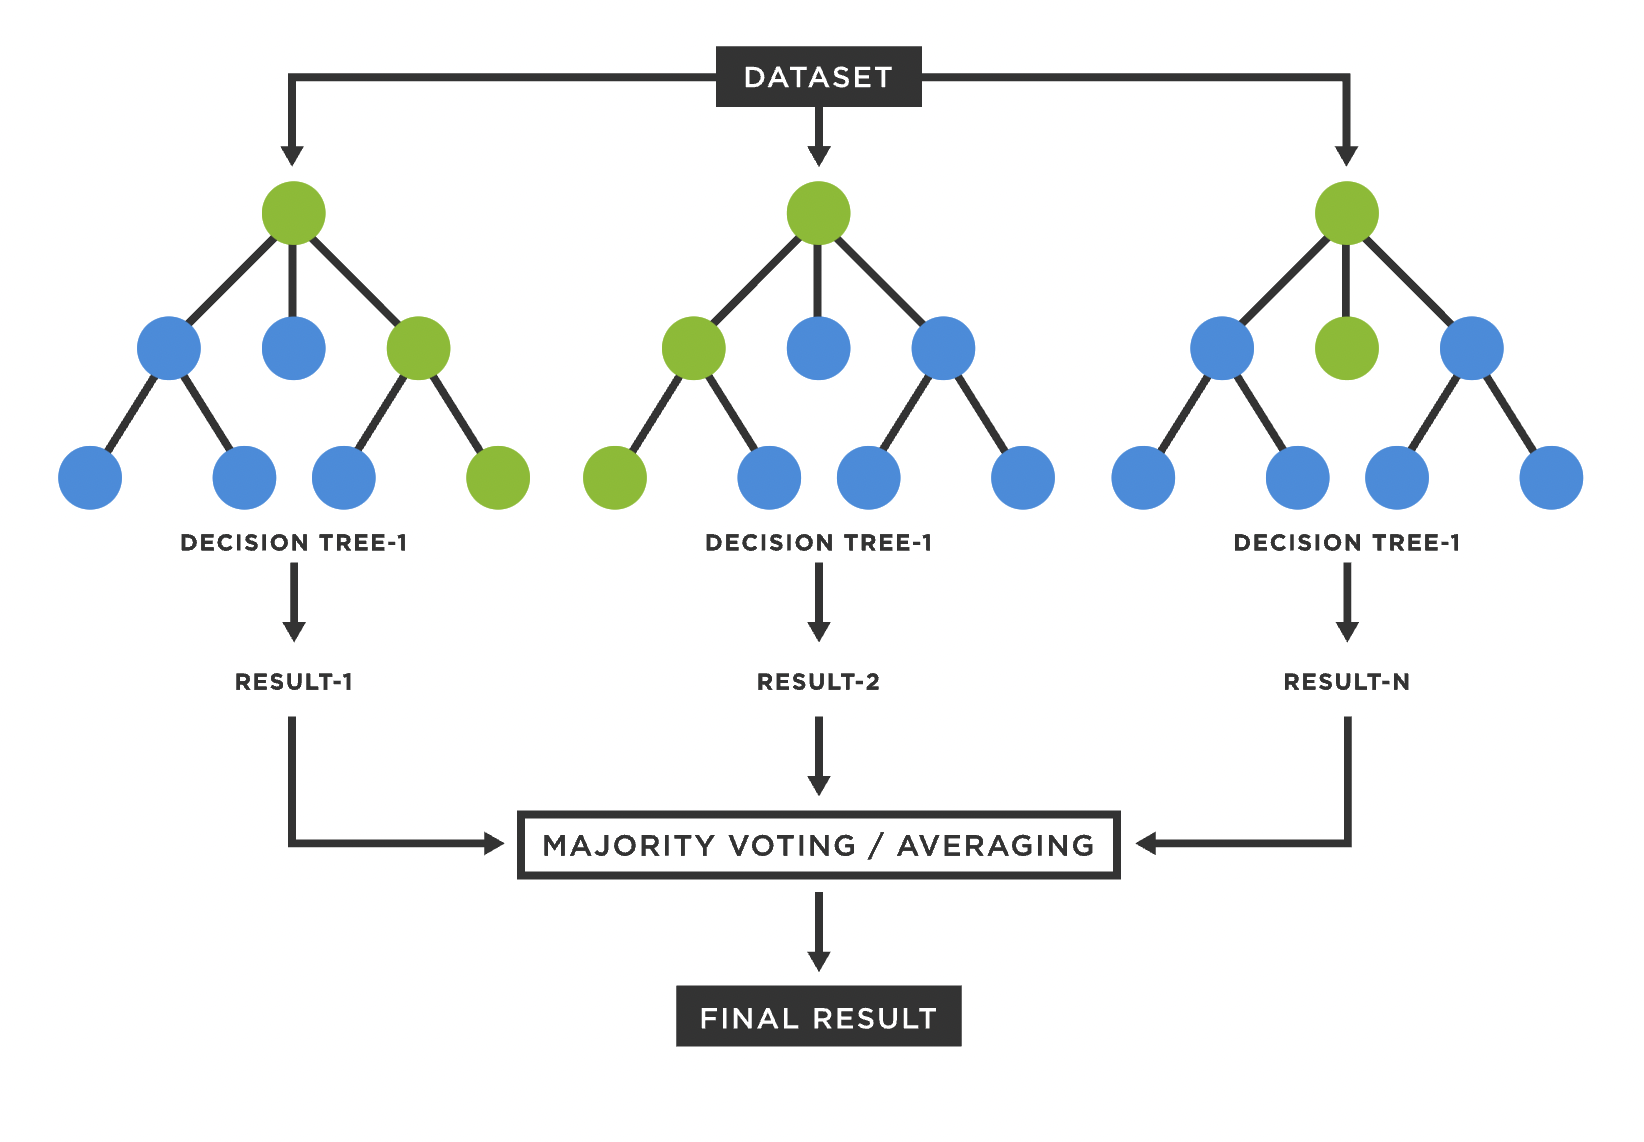

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor

In [ ]:
# Initializam Modelul
gb_reg = GradientBoostingRegressor(n_estimators=1000, max_depth=3, criterion='friedman_mse', learning_rate=0.1)

# Ajustam modelul pe datele de antrenare
gb_reg.fit(x_train_norm, y_train_norm)

GradientBoostingRegressor(n_estimators=1000)

In [ ]:
# Calculam predictiile modelului pe setul de testare
y_pred = gb_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [ ]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_pred_unnorm, y_test))

Am obtinut o performanta mult mai buna (eroare mai mica) folosind un ansamblu de arbori decizionali.

In [ ]:
# Initializam Modelul
rf_reg = RandomForestRegressor(n_estimators=100)

# Ajustam modelul pe datele de antrenare
rf_reg.fit(x_train_norm, y_train_norm)

RandomForestRegressor()

In [ ]:
# Calculam predictiile modelului pe setul de testare
y_pred = rf_reg.predict(x_test_norm)
y_pred_unnorm = (y_pred * y_std_train) + y_mean_train

In [ ]:
# Calculam performanta modelului pe setul de testare
sqrt(mean_squared_error(y_pred_unnorm, y_test))